In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
train.head(5).T

,0,1,2,3,4
id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes


In [5]:
test.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [6]:
test.head(5).T

,0,1,2,3,4
id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes


In [7]:
df = train

# Remove id
df = df.drop(['id'], axis=1)
# 独热编码
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
# Convert the output variable to numerical using Label Encoding
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,False,...,True,False,False,True,False,False,False,False,True,False


In [8]:
print(df.dtypes)

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                              int32
Gender_Female                            bool
Gender_Male                              bool
family_history_with_overweight_no        bool
family_history_with_overweight_yes       bool
FAVC_no                                  bool
FAVC_yes                                 bool
CAEC_Always                              bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_no                                 bool
SMOKE_yes                                bool
SCC_no                            

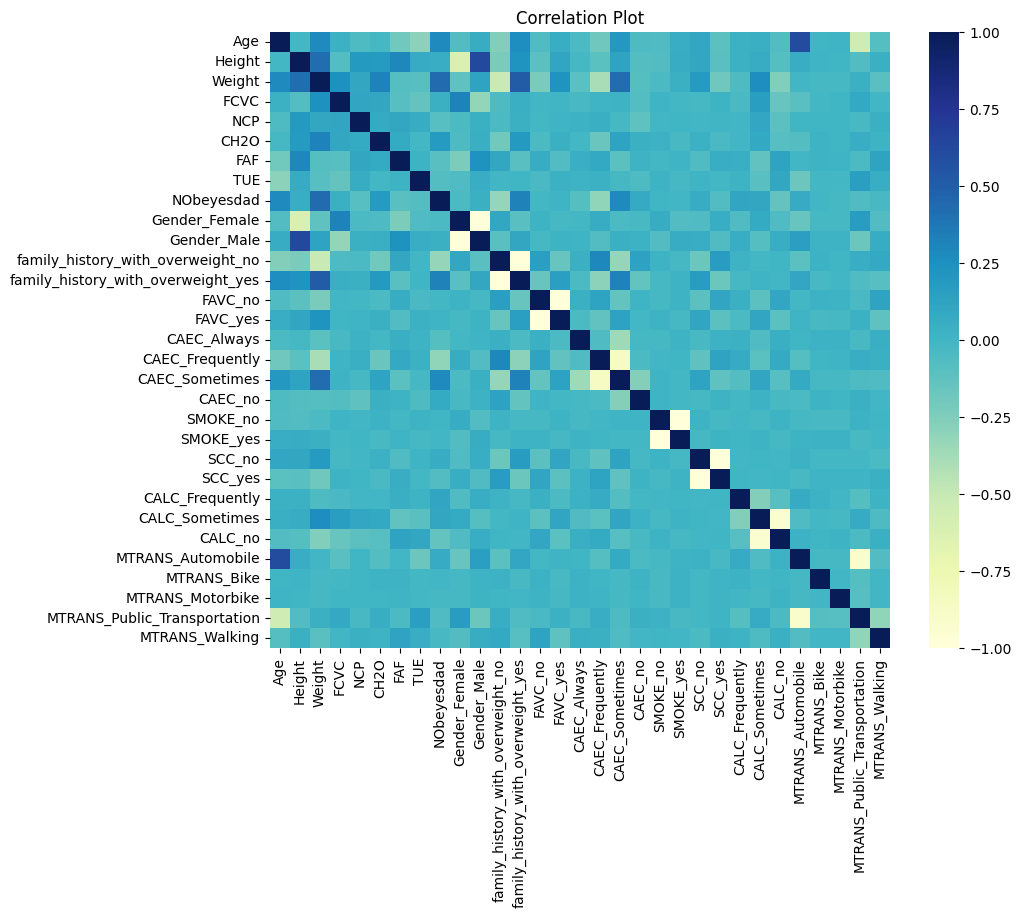

In [9]:
# 相关性
correlation_matrix = df.corr()

# 热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Plot')
plt.show()

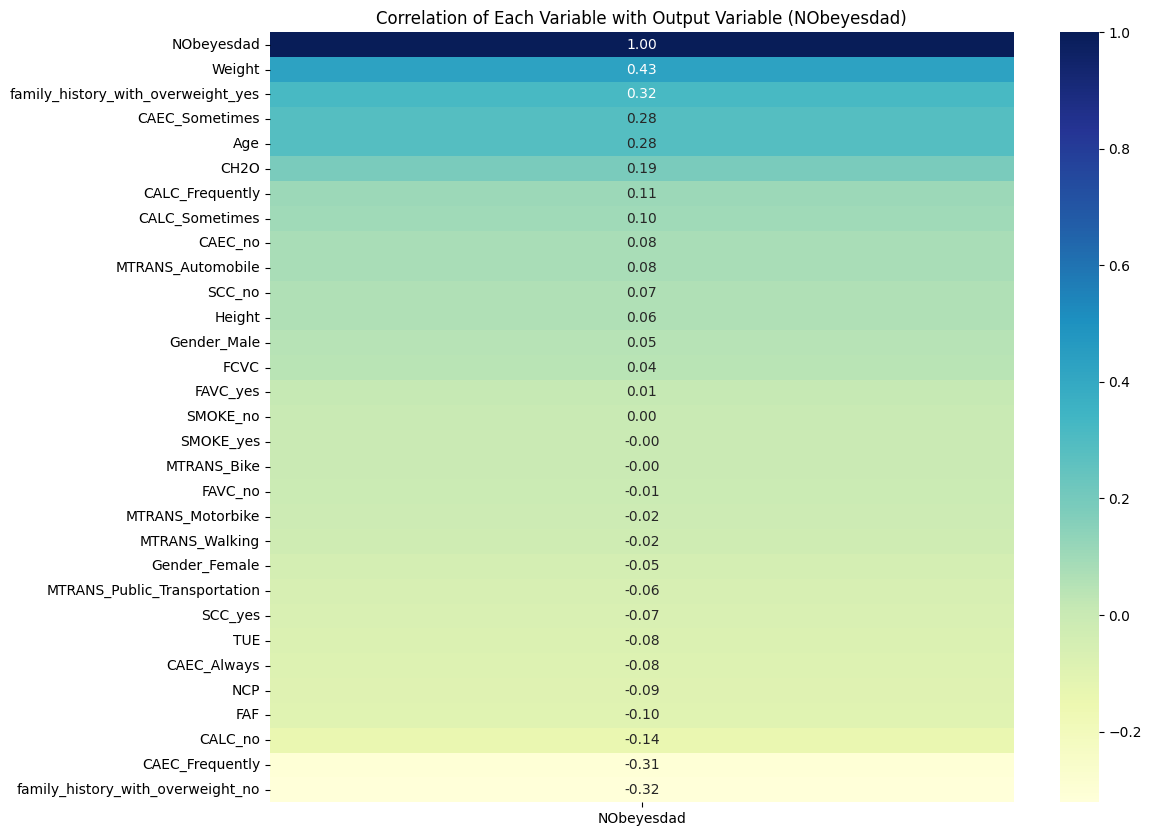

In [10]:
# 相关度表
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['NObeyesdad']].sort_values(by='NObeyesdad', ascending=False), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation of Each Variable with Output Variable (NObeyesdad)')
plt.show()

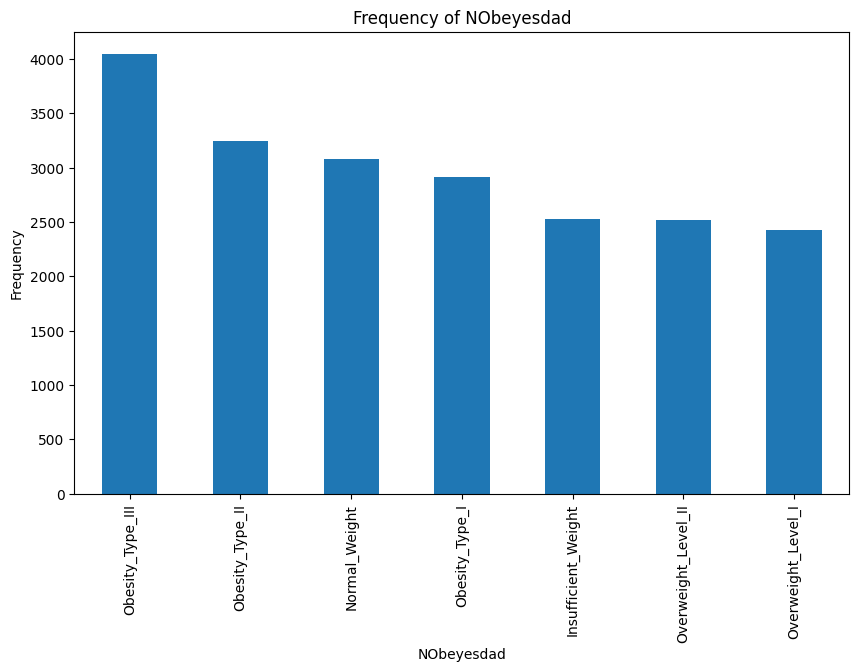

In [11]:
value_counts = train['NObeyesdad'].value_counts()

# 直方图
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Frequency of NObeyesdad')
plt.xlabel("NObeyesdad")
plt.ylabel('Frequency')
plt.show()

In [12]:
# 分割特征和目标变量
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,True,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,False,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,False,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,False,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,False,True,...,True,False,False,True,False,False,False,False,True,False
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,False,True,...,True,False,False,False,True,False,False,False,True,False
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,False,True,...,True,False,False,False,True,True,False,False,False,False


In [13]:
# 标准化数字特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 0.10569857, -0.00282826, -0.23571264, ..., -0.04282496,
         0.49392547, -0.15170738],
       [-1.0270519 , -1.60629083, -1.17093118, ..., -0.04282496,
        -2.02459697, -0.15170738],
       [-1.0270519 ,  0.12845138, -1.43001211, ..., -0.04282496,
         0.49392547, -0.15170738],
       ...,
       [-0.65766899,  1.36653688,  0.6707173 , ..., -0.04282496,
         0.49392547, -0.15170738],
       [ 1.76006735, -0.00280536, -0.16557441, ..., -0.04282496,
        -2.02459697, -0.15170738],
       [ 0.49905134,  1.33206194,  1.14664506, ..., -0.04282496,
         0.49392547, -0.15170738]])

In [14]:
# DNN
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X.shape[1],)),
    Dropout(0.05),

    Dense(128, activation='relu'),
    Dropout(0.05),
    
    Dense(256, activation='relu'),
    Dropout(0.1),

    Dense(512, activation='relu'),
    Dropout(0.15),

    Dense(256, activation='relu'),
    Dropout(0.15),

    Dense(128, activation='relu'),
    Dropout(0.1),

    Dense(64, activation='relu'),
    Dropout(0.1),

    Dense(32, activation='relu'),
    Dropout(0.05),

    Dense(16, activation='relu'),
    
    Dense(len(df['NObeyesdad'].unique()), activation='softmax')  # Output layer with softmax activation

])

In [15]:

optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[-1.20286263,  0.79893738,  0.34543758, ..., -0.04282496,
        -2.02459697, -0.15170738],
       [-0.20643844,  0.60868383, -1.25140824, ..., -0.04282496,
         0.49392547, -0.15170738],
       [-0.35223353,  1.37008745,  1.29411405, ..., -0.04282496,
         0.49392547, -0.15170738],
       ...,
       [-0.49961971, -0.91908277, -0.75392977, ..., -0.04282496,
         0.49392547, -0.15170738],
       [ 0.37943394, -0.57404706,  0.91178885, ..., -0.04282496,
         0.49392547, -0.15170738],
       [ 2.48879562,  0.84853089,  0.76239407, ..., -0.04282496,
        -2.02459697, -0.15170738]])

In [17]:
optimizer.learning_rate.assign(0.0001)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

optimizer.learning_rate.assign(0.00005)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

optimizer.learning_rate.assign(0.00001)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
519/519 [==============================] - 3s 4ms/step - loss: 1.6416 - accuracy: 0.3186 - val_loss: 1.1798 - val_accuracy: 0.5291
Epoch 2/10
519/519 [==============================] - 2s 4ms/step - loss: 1.1528 - accuracy: 0.5258 - val_loss: 0.8888 - val_accuracy: 0.6445
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 0.9673 - accuracy: 0.5903 - val_loss: 0.7218 - val_accuracy: 0.7276
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 0.8469 - accuracy: 0.6419 - val_loss: 0.6096 - val_accuracy: 0.7570
Epoch 5/10
519/519 [==============================] - 2s 4ms/step - loss: 0.7805 - accuracy: 0.6744 - val_loss: 0.5667 - val_accuracy: 0.7787
Epoch 6/10
519/519 [==============================] - 2s 4ms/step - loss: 0.7334 - accuracy: 0.6998 - val_loss: 0.5283 - val_accuracy: 0.7989
Epoch 7/10
519/519 [==============================] - 2s 4ms/step - loss: 0.6977 - accuracy: 0.7140 - val_loss: 0.4907 - val_accuracy: 0.8211
Epoch 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



for train_index, val_index in kfold.split(X):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y[train_index], y[val_index]
    
    print("---------------------------------------------------------------")
    print(f"Training data shape: {X_train.shape}, Validation data shape: {X_test.shape}")
    
    for lr in [0.0005, 0.00001, 0.000001, 0.0000001]:
        optimizer.learning_rate.assign(lr)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
        
        # Get validation predictions
        val_predictions = model.predict(X_test)
        val_output = np.argmax(val_predictions, axis=1)
        
        # Calculate validation metrics
        val_accuracy = accuracy_score(y_test, val_output)
        val_f1 = f1_score(y_test, val_output, average='macro')
        val_roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), 
                                     label_binarize(val_output, classes=np.unique(y_test)), multi_class='ovr')
        
        print(f"Learning Rate: {lr}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print(f"Validation F1 Score: {val_f1:.4f}")
        print(f"Validation ROC AUC: {val_roc_auc:.4f}")

---------------------------------------------------------------
Training data shape: (16606, 30), Validation data shape: (4152, 30)
Epoch 1/10
519/519 [==============================] - 2s 4ms/step - loss: 0.5757 - accuracy: 0.7791 - val_loss: 0.4981 - val_accuracy: 0.8032
Epoch 2/10
519/519 [==============================] - 2s 4ms/step - loss: 0.5470 - accuracy: 0.7898 - val_loss: 0.4113 - val_accuracy: 0.8543
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 0.5182 - accuracy: 0.8036 - val_loss: 0.4074 - val_accuracy: 0.8497
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 0.4989 - accuracy: 0.8172 - val_loss: 0.4402 - val_accuracy: 0.8509
Epoch 5/10
519/519 [==============================] - 2s 4ms/step - loss: 0.4944 - accuracy: 0.8189 - val_loss: 0.3990 - val_accuracy: 0.8649
Epoch 6/10
519/519 [==============================] - 2s 4ms/step - loss: 0.4739 - accuracy: 0.8272 - val_loss: 0.3761 - val_accuracy: 0.8736
Epoch 7/10
519/5

In [19]:
loss, accuracy = model.evaluate(X, y)
print(f'Test Accuracy: {accuracy}')

649/649 [==============================] - 1s 1ms/step - loss: 0.2710 - accuracy: 0.9067
Test Accuracy: 0.9066866040229797


In [20]:
predictions = model.predict(X)
test_output = np.argmax(predictions, axis=1)
predictions

649/649 [==============================] - 1s 1ms/step


array([[9.5510868e-06, 3.6813013e-04, 9.2105856e-03, ..., 1.1244570e-06,
        6.2432077e-02, 9.2787141e-01],
       [1.3010222e-01, 7.9906327e-01, 2.8385026e-03, ..., 3.9350966e-04,
        5.3023212e-02, 1.4566741e-02],
       [8.1824684e-01, 1.5713461e-01, 4.2527681e-03, ..., 2.7929980e-04,
        2.0039810e-02, 4.6415869e-05],
       ...,
       [1.3241208e-06, 3.1352756e-09, 9.8319650e-01, ..., 1.4673850e-05,
        5.8069058e-06, 4.0177815e-03],
       [4.2025783e-07, 1.9469748e-05, 5.1892227e-03, ..., 4.5379970e-08,
        7.6561989e-03, 9.8705208e-01],
       [1.1195155e-09, 2.8678646e-13, 4.9861656e-03, ..., 2.9526322e-05,
        4.9413993e-09, 2.1502336e-05]], dtype=float32)

In [21]:
# Test F1 score
test_f1 = f1_score(y, test_output, average='macro')
print(f"Test F1 Score: {test_f1:.4f}")

Test F1 Score: 0.8969


In [22]:
# Test ROC AUC
test_roc_auc = roc_auc_score(label_binarize(y, classes=np.unique(y)), 
                              label_binarize(test_output, classes=np.unique(y)), multi_class='ovr')
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test ROC AUC: 0.9408


In [23]:
output = [0] * len(predictions)
for i in range(len(predictions)):
    output[i] = np.argmax(predictions[i]) 
    
# print first 100 values of the output
print(output[0:100])

# output = label_encoder.inverse_transform(output)

[6, 1, 0, 4, 6, 0, 3, 3, 5, 4, 1, 1, 2, 4, 1, 3, 6, 1, 6, 3, 6, 1, 4, 2, 0, 2, 4, 4, 1, 6, 3, 2, 4, 6, 3, 6, 6, 4, 6, 0, 0, 2, 2, 4, 6, 5, 3, 4, 2, 4, 3, 5, 0, 6, 4, 0, 6, 5, 5, 0, 0, 2, 4, 1, 3, 0, 2, 6, 6, 6, 6, 2, 4, 6, 4, 0, 5, 6, 5, 2, 2, 3, 0, 5, 3, 6, 4, 3, 4, 3, 2, 4, 1, 0, 3, 5, 3, 5, 4, 2]


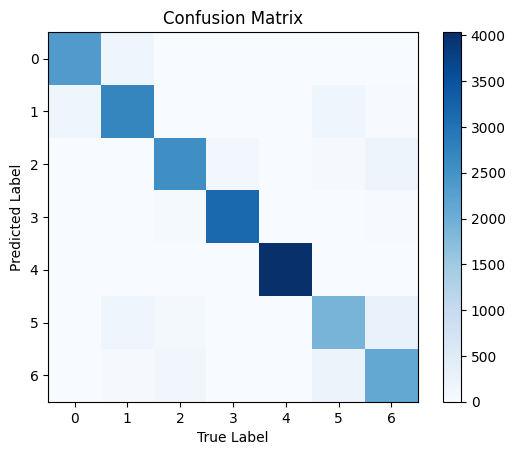

In [24]:
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
cm = confusion_matrix(y, output)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [25]:
# 分类情况
class_report = classification_report(y, output)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2523
           1       0.88      0.88      0.88      3082
           2       0.90      0.88      0.89      2910
           3       0.96      0.97      0.97      3248
           4       1.00      1.00      1.00      4046
           5       0.81      0.78      0.80      2427
           6       0.81      0.84      0.82      2522

    accuracy                           0.91     20758
   macro avg       0.90      0.90      0.90     20758
weighted avg       0.91      0.91      0.91     20758



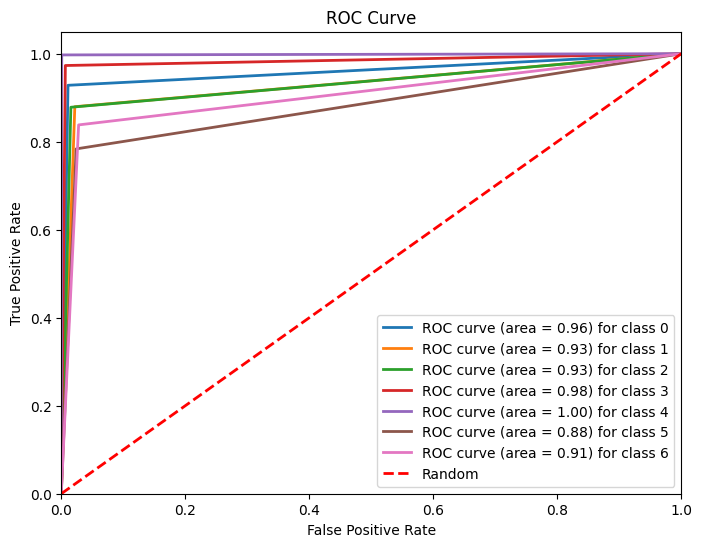

In [26]:
# ROC Curve
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y, classes=np.unique(y))
output_bin = label_binarize(output, classes=np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], output_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
test_df = test

# Remove id
test_df = test_df.drop(['id'], axis=1)
test_df['CALC'] = test_df['CALC'].replace('Always', 'Frequently')
# Convert categorical variables to numerical variables using one-hot encoding
test_df = pd.get_dummies(test_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
test_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,True,False,...,True,False,False,True,False,False,False,False,True,False
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,True,False,...,True,False,False,True,False,False,False,False,True,False
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,True,False,...,True,False,False,True,False,False,False,False,True,False


In [28]:
X = scaler.transform(test_df)
test_predictions = model.predict(X)
test_predictions

433/433 [==============================] - 0s 1ms/step


array([[3.9676126e-10, 4.3856357e-14, 4.7651338e-03, ..., 2.1164045e-05,
        1.5833730e-09, 1.0832209e-05],
       [2.8773118e-05, 1.7287233e-03, 1.1216778e-02, ..., 2.6344940e-05,
        9.6018851e-01, 2.6802722e-02],
       [5.5722795e-09, 6.8003152e-14, 2.9252432e-04, ..., 9.9970740e-01,
        3.8926650e-11, 2.9109551e-10],
       ...,
       [9.6770734e-01, 3.0330701e-02, 5.9189464e-05, ..., 2.7218258e-07,
        1.9024119e-03, 3.1988581e-08],
       [3.7793016e-01, 6.1556649e-01, 5.0997053e-04, ..., 1.9826811e-04,
        5.5222637e-03, 2.7187949e-04],
       [1.2989240e-10, 9.4453940e-15, 3.9646155e-03, ..., 9.4207708e-06,
        5.3729243e-10, 6.2328509e-06]], dtype=float32)

In [29]:
output = [0] * len(test_predictions)
for i in range(len(test_predictions)):
    output[i] = np.argmax(test_predictions[i]) 
    
# print first 100 values of the output
print(output[0:100])

# inverse transform encoded labels
output = label_encoder.inverse_transform(output)
print(output[0:100])

[3, 5, 4, 2, 4, 0, 0, 5, 6, 1, 0, 4, 4, 2, 4, 5, 2, 2, 4, 2, 1, 4, 4, 3, 5, 2, 3, 6, 0, 2, 6, 4, 2, 3, 5, 5, 6, 1, 0, 6, 3, 6, 3, 6, 1, 0, 6, 3, 2, 3, 3, 4, 4, 4, 3, 1, 0, 5, 3, 4, 5, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 4, 3, 4, 2, 6, 3, 2, 4, 1, 3, 3, 0, 4, 0, 4, 0, 1, 1, 1, 6, 5, 0, 0, 4, 4, 0, 3, 1, 2]
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Obesity_Type_III' 'Insufficient_Weight'
 'Insufficient_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Normal_Weight' 'Obesity_Type_III' 'Obesity_Type_III'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_II' 'Insufficient_Weight' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II' 'Overweight_Level_I' 'Overweight_Level_

In [30]:
submission = pd.DataFrame({'id': test['id'], 'NObeyesdad': output})

print(submission.head())

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [31]:
submission.to_csv('submission.csv', index=False)